In [2]:
from numpy import *
import operator
import matplotlib.pyplot as plt

def createDataSet():
  train_group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
  train_labels =['A','A','B','B']
  test_group = array([[0.9,1.1],[0.8,1.0],[0,0.2],[0.2,0.1]])
  test_labels = ['A','A','B','B']
  return train_group, train_labels, test_group, test_labels

In [3]:
train_group, train_labels, test_group, test_labels = createDataSet()
print(train_group)
print(train_labels)

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
['A', 'A', 'B', 'B']


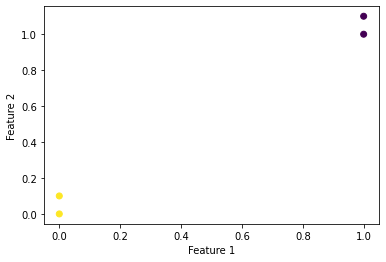

In [4]:
def visualizeData(group, labels):
  unique_labels, color = unique(labels, return_inverse=True)
  scatter = plt.scatter(group[:,0],group[:,1],c=color)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.show()
visualizeData(train_group, train_labels)

In [5]:
def classify0(inX, dataSet, labels, k):
  print(dataSet.shape)
  dataSetSize = dataSet.shape[0]
  print(dataSetSize)
  diffMat = tile(inX, (dataSetSize,1)) - dataSet
  print(diffMat)
  sqDiffMat = diffMat**2
  sqDistances = sqDiffMat.sum(axis=1)
  distances = sqDistances**0.5
  sortedDistIndicies = distances.argsort()
  classCount={}
  for i in range(k):
    voteIlabel = labels[sortedDistIndicies[i]]
    classCount[voteIlabel] = classCount.get(voteIlabel,0) + 1
  sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1), reverse=True)
  return sortedClassCount[0][0]

In [6]:
classify0([0,0], train_group, train_labels, 3)

(4, 2)
4
[[-1.  -1.1]
 [-1.  -1. ]
 [ 0.   0. ]
 [ 0.  -0.1]]


'B'

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
['A', 'A', 'B', 'B']


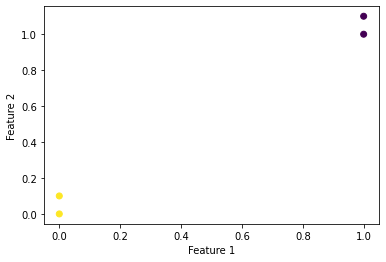

1.0


In [7]:
from numpy import *
import operator
import matplotlib.pyplot as plt

def createDataSet():
  train_group = array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
  train_labels =['A','A','B','B']
  test_group = array([[0.9,1.1],[0.8,1.0],[0,0.2],[0.2,0.1]])
  test_labels = ['A','A','B','B']
  return train_group, train_labels, test_group, test_labels

train_group, train_labels, test_group, test_labels = createDataSet()
print(train_group)
print(train_labels)

def visualizeData(group, labels):
  unique_labels, color = unique(labels, return_inverse=True)
  scatter = plt.scatter(group[:,0],group[:,1],c=color)
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.show()
visualizeData(train_group, train_labels)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def KNNTest(train_group, train_labels, test_group, test_labels):
  clf = KNeighborsClassifier(3)
  clf.fit(train_group,train_labels)
  y_pred_NN = clf.predict(test_group)
  print(accuracy_score(test_labels, y_pred_NN, normalize=True))
  
KNNTest(train_group, train_labels, test_group, test_labels)